# EDA on Netflix series
### By Marawan Abdelrahman

### Steps
* Data Wrangling
* Univarite Exploration with conclusions
* Bivarite Exploration with conclusions
* Univarite Exploration with conclusions

### EDA on Netflix Egypt
* Univariate Exploration with conclusions

First we will start with data wrangling

## Data Wrangling

Imorting libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

Imorting data set 

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [5]:
df["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [6]:
df["type"].isnull().sum()

0

In [7]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
ratings_ages     True
dtype: bool

In [8]:
df["country"].value_counts()

United States                             2555
India                                      923
United Kingdom                             397
Japan                                      226
South Korea                                183
                                          ... 
Denmark, France, United States, Sweden       1
Spain, Cuba                                  1
France, Canada, China, Cambodia              1
Hong Kong, Iceland, United States            1
France, Japan, United States                 1
Name: country, Length: 681, dtype: int64

In [9]:
df["country"].nunique()

681

In [10]:
df["country"].unique()[-20:-1]

array(['France, Norway, Lebanon, Belgium',
       'United Kingdom, France, United States, Belgium',
       'Saudi Arabia, United Arab Emirates',
       'Peru, United States, United Kingdom',
       'Germany, United States, United Kingdom, Canada',
       'Uruguay, Argentina, Germany, Spain',
       'France, Luxembourg, United States', 'United Kingdom, Spain',
       'Canada, India, Thailand, United States, United Arab Emirates',
       'Romania, Bulgaria, Hungary',
       'United States, East Germany, West Germany',
       'France, Netherlands, South Africa, Finland',
       'United Kingdom, Ukraine, United States',
       'Egypt, Austria, United States', 'Russia, Spain',
       'Croatia, Slovenia, Serbia, Montenegro', 'Japan, Canada',
       'United States, France, South Korea, Indonesia',
       'United Arab Emirates, Jordan'], dtype=object)

In [11]:
df["listed_in"].nunique()

492

In [12]:
df["listed_in"].unique()[:5]

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas'], dtype=object)

In [13]:
df.duplicated().any()

False

In [14]:
df2 = df.dropna(subset = ['country'])
df2 = pd.DataFrame(df2.country.str.split(', ').tolist(), index=df2.show_id).stack()
df2 = df2.reset_index([0, 'show_id'])
df2.columns = ['show_id', 'country']

In [15]:
df2

,show_id,country
0,s1,Brazil
1,s2,Mexico
2,s3,Singapore
3,s4,United States
4,s5,United States
...,...,...
9058,s7784,India
9059,s7786,Australia
9060,s7787,United Kingdom
9061,s7787,Canada


In [16]:
df3 = df.copy()
df3.drop(["director","cast"],axis= 1,inplace = True)
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7265 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7265 non-null   object
 1   type          7265 non-null   object
 2   title         7265 non-null   object
 3   country       7265 non-null   object
 4   date_added    7265 non-null   object
 5   release_year  7265 non-null   int64 
 6   rating        7265 non-null   object
 7   duration      7265 non-null   object
 8   listed_in     7265 non-null   object
 9   description   7265 non-null   object
 10  ratings_ages  7265 non-null   object
dtypes: int64(1), object(10)
memory usage: 681.1+ KB


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  ratings_ages  7780 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [18]:
df4 = df.dropna(subset = ['listed_in'])
df4 = pd.DataFrame(df.listed_in.str.split(', ').tolist(), index=df.show_id).stack()
df4 = df4.reset_index([0, 'show_id'])
df4.columns = ['show_id', 'listed_in']

In [19]:
df4.head()

,show_id,listed_in
0,s1,International TV Shows
1,s1,TV Dramas
2,s1,TV Sci-Fi & Fantasy
3,s2,Dramas
4,s2,International Movies


__What is the insights that is concluded from this step?__<br>
I see the the dataframe :
* Consists of 7786 rows and 12 column.
* Contains Nan values especially director and cast columns.
* doesn't have any dublicates
* listed_in and country columns are concatenated.<br>

__What did I do?__<br>
I :
* have assigned different ratings in different column
* Left Nan column without filtering to prevent unnecessary data loss. Then do the filtering during the Exploration.
* have made two different table for country and listed in to use it in the following exploration.

## Univariate Exploration with conclusions

### most frequent directors in Netflix movies 

In [20]:
df.director.describe()

count                       5398
unique                      4049
top       Raúl Campos, Jan Suter
freq                          18
Name: director, dtype: object

### The relation between number of movies and tv shows in netlix by the years 

In [21]:
bins = np.linspace(1925,2021,17)

In [22]:
labels = ((1925, 1931)
,(1931, 1937)
,(1937, 1943)
,(1943, 1949)
,(1949, 1955)
,(1955, 1961)
,(1961, 1967)
,(1967, 1973)
,(1973, 1979)
,(1979, 1985)
,(1985, 1991)
,(1991, 1997)
,(1997, 2003)
,(2003, 2009)
,(2009, 2015)
,(2015, 2021))
df["grouped_years"] = pd.cut(df["release_year"], bins=bins,labels = labels, include_lowest=False)


Text(0, 0.5, 'Number of productions')

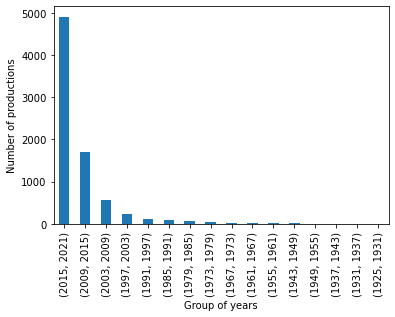

In [23]:
df["grouped_years"].value_counts().plot(kind="bar")
plt.xlabel("Group of years", fontsize = 10)
plt.ylabel("Number of productions", fontsize = 10)

__Observations and Conclusions:__ We can see here that the number of productions streamed on netflix increase alot around 2003 and 2009 and this means Series and movies production increase generally around this years. 

### The Number of movies and series with their ratings

Text(0, 0.5, 'Number of productions')

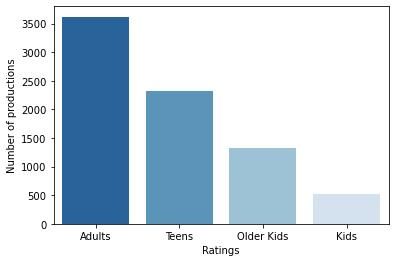

In [24]:
sns.countplot(data = df, x = "ratings_ages",palette = "Blues_r")
plt.xlabel("Ratings", fontsize = 10)
plt.ylabel("Number of productions", fontsize = 10)

__Observations and Conclusions:__ Most of Produced movies are made for Adults and least production is for Kids

### What is more availabe in Netflix (Movies or Series)?


<AxesSubplot:ylabel='type'>

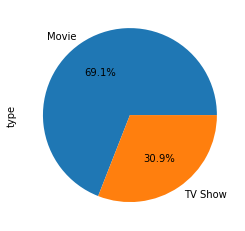

In [25]:
df["type"].value_counts().plot(kind="pie",autopct="%1.1f%%")

__Observations and Conclusions:__ The ratio between movies and tv shows are a bit big. 

### The number of movies and Series produced by each country

Text(0.5, 0, 'Number of productions')

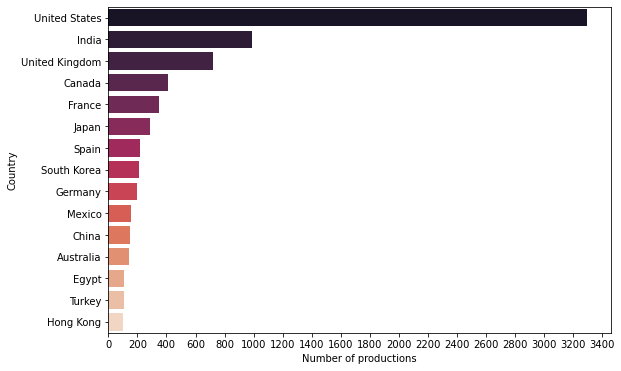

In [26]:
plt.figure(figsize=(9,6))
graph1 = sns.countplot(data = df2, y = "country",order=df2["country"].value_counts().iloc[:15].index,palette="rocket")
graph1.xaxis.set_major_locator(ticker.MultipleLocator(200))
graph1.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ylabel("Country", fontsize = 10)
plt.xlabel("Number of productions", fontsize = 10)

__Observations and Conclusions:__ Here we can see the top country producers available in Netflix. USA is the lead.

### The number of movies and series in each genre

Text(0.5, 0, 'Number of productions')

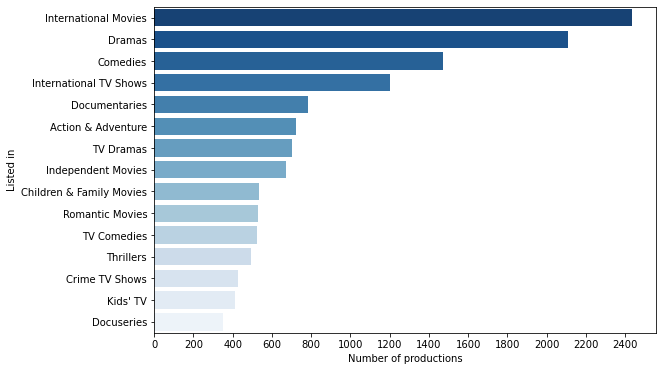

In [27]:
plt.figure(figsize=(9,6))
graph2 = sns.countplot(data = df4, y = "listed_in",order=df4["listed_in"].value_counts().iloc[:15].index,palette="Blues_r")
graph2.xaxis.set_major_locator(ticker.MultipleLocator(200))
graph2.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ylabel("Listed in", fontsize = 10)
plt.xlabel("Number of productions", fontsize = 10)

__Observations and Conclusions:__ Most Netflix productions are listed in international movies. the least is docuseries.


## Bivariate Exploration

### The relation between each country production with the type of production

In [28]:
df5 = df.dropna(subset = ['country'])
df5 = pd.DataFrame(df5.country.str.split(', ').tolist(), index=df5.type).stack()
df5 = df5.reset_index([0, 'type'])
df5.columns = ['type', 'country']


In [29]:
x = df5["country"].value_counts().index[:5]
df5_top = df5[df5["country"].isin(x)]
df5_top = df5_top.reset_index()
df5_top

,index,type,country
0,3,Movie,United States
1,4,Movie,United States
2,7,Movie,United States
3,8,Movie,India
4,9,Movie,India
...,...,...,...
5764,9055,Movie,United Kingdom
5765,9058,Movie,India
5766,9060,Movie,United Kingdom
5767,9061,Movie,Canada


Text(0, 0.5, 'Number of productions')

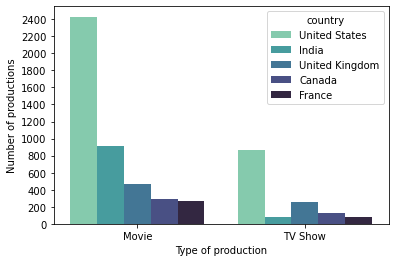

In [30]:
g = sns.countplot(data = df5_top, x = "type",hue = "country",palette="mako_r")
g.yaxis.set_major_locator(ticker.MultipleLocator(200))
g.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel("Type of production", fontsize = 10)
plt.ylabel("Number of productions", fontsize = 10)

__Observations and Conclusions:__ the bar plot of movies is right skewed but it is different in the tv shows. India production of Tv shows is less by than france although its production in general is high. This means the demand for movies in India Netflix is more than its demand to shows by a big ratio.

In [31]:
df6 = df.dropna(subset = ['country'])
df6 = pd.DataFrame(df6.country.str.split(', ').tolist(), index=df6.ratings_ages).stack()
df6 = df6.reset_index([0, 'ratings_ages'])
df6.columns = ['ratings_ages', 'country']


In [32]:
x2 = df6["country"].value_counts().index[:5]
df6_top = df6[df6["country"].isin(x)]
df6_top = df6_top.reset_index()
df6_top

,index,ratings_ages,country
0,3,Teens,United States
1,4,Teens,United States
2,7,Adults,United States
3,8,Teens,India
4,9,Adults,India
...,...,...,...
5764,9055,Adults,United Kingdom
5765,9058,Teens,India
5766,9060,Adults,United Kingdom
5767,9061,Adults,Canada


### The relation between each country production with the ratings of production

Text(0, 0.5, 'Number of productions')

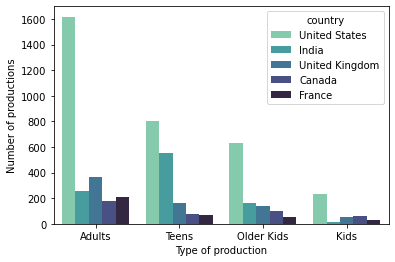

In [33]:
g2 = sns.countplot(data = df6_top, x = "ratings_ages",hue = "country",palette="mako_r",order= ["Adults","Teens", "Older Kids","Kids"])
g2.yaxis.set_major_locator(ticker.MultipleLocator(200))
g2.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel("Type of production", fontsize = 10)
plt.ylabel("Number of productions", fontsize = 10)

__Observations and Conclusions:__ Here we can see USA production are made more to adults also UK, canda and france except India. its production are mode more to teens.

## Multivariate Exploration with conclusions

### The relation between each country production with the ratings of production in each group of years

/Users/salahkhalil/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, -33.29375000000002, 'Grouped years')

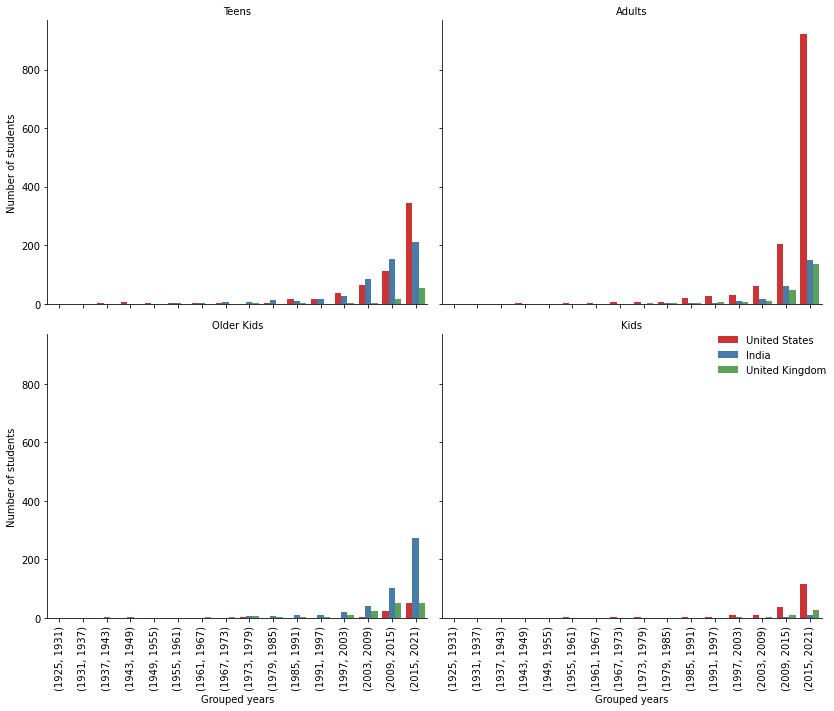

In [34]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs)
df8_top = df[df["country"].isin(x2[:3])]
g2 = sns.FacetGrid(df8_top, col ="ratings_ages",col_wrap=2,size=5)
g2.map(countplot, "grouped_years","country",palette='Set1')
g2.set_titles(col_template = "{col_name}")
g2.add_legend()

for axes in g2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=10)
plt.tight_layout()
g2.axes[0].set_ylabel("Number of students",fontsize = 10)
g2.axes[2].set_ylabel("Number of students",fontsize = 10)
g2.axes[3].set_xlabel("Grouped years",fontsize = 10)
g2.axes[2].set_xlabel("Grouped years",fontsize = 10)

__Observations and Conclusions:__ All types of production ratings in each county increases gradually except in USA with adults and India with older kids. this two increases in production each year by a lot. Kids production increases slightly over the years

## Exploratory Data analysis on Netflix Egypt

### Univariate Exploration with conclusions

In [35]:
df_E = df[df["country"] == "Egypt"].reset_index()
df_E.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ratings_ages,grouped_years
0,6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Adults,"(2015, 2021)"
1,103,s104,Movie,30 Days of Luxury,Hani Hamdi,"Taher Farouz, Sad Al-Saghir, Ahmad Faloks, Sol...",Egypt,"April 18, 2019",2016,TV-14,91 min,"Comedies, International Movies","With the help of his friends, a man breaks out...",Teens,"(2015, 2021)"
2,280,s281,Movie,Abdo Mota,NaN,Mohamed Ramadan,Egypt,"April 19, 2019",2012,TV-MA,100 min,"Action & Adventure, Dramas, International Movies","Following the mysterious death of his parents,...",Adults,"(2009, 2015)"
3,371,s372,Movie,Alarmoty in the Land of Fire,NaN,NaN,Egypt,"August 5, 2019",2017,TV-MA,94 min,"Comedies, International Movies","While vacationing at a resort, an ornery and o...",Adults,"(2015, 2021)"
4,447,s448,Movie,Amar's Hands,Khaled Youssef,"Ghadah Abdulrazeq, Wafaa Amer, Hassan El Radda...",Egypt,"April 26, 2019",2011,TV-14,125 min,"Dramas, International Movies",To fulfill her husband’s dream to build a home...,Teens,"(2009, 2015)"


### Number of production in Egypt

In [36]:
len(df_E)

101

### Number of production in Egypt with the type

Text(0, 0.5, 'Number of productions')

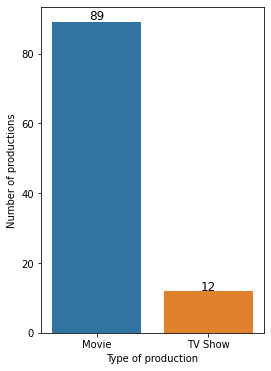

In [37]:
plt.figure(figsize=(4,6))
ax = sns.countplot(data = df_E,x = "type")
for p in ax.patches:
    height = p.get_height() 
    ax.text(p.get_x()+p.get_width()/2.,
            height + height*.01,
            '%d' % height,
            fontsize = 12,
            ha="center")
plt.xlabel("Type of production", fontsize = 10)
plt.ylabel("Number of productions", fontsize = 10)

__Observations and Conclusions:__ Netflix library of Egypt is filled with movies than the tv series.


### Number of production in Egypt with the ratings

Text(0, 0.5, 'Number of productions')

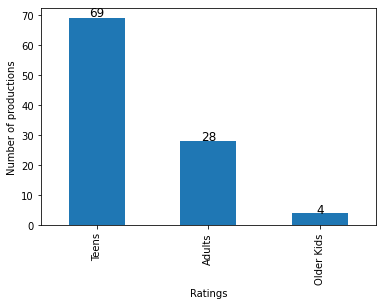

In [38]:
ax = df_E["ratings_ages"].value_counts().plot(kind="bar")
for p in ax.patches:
    height = p.get_height() 
    ax.text(p.get_x()+p.get_width()/2.,
            height + height*.01,
            '%d' % height,
            fontsize = 12,
            ha="center")
plt.xlabel("Ratings", fontsize = 10)
plt.ylabel("Number of productions", fontsize = 10)

__Observations and Conclusions:__ Also teens is more preferred here than other genres. We see here that there is no kids production in Netflix by Egypt.


### Oldest year Egypt production in Netflix

In [39]:
df_E["release_year"].min()

1954